# Exploratory Data Analysis

> Icentia11k dataset

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import wfdb

from ecg_classification.data_loader import Icentia11k

DEBUG:matplotlib:matplotlib data path: /home/ubungu/projects/ECG_Classification/.venv/lib/python3.11/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/ubungu/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/ubungu/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/ubungu/.cache/matplotlib/fontlist-v390.json


## Visualizing ECG Recordings + Arrythmias

In [2]:
dataset = Icentia11k(Path("../data/icentia11k"))

In [3]:
# Adjust parameters to download additional data
dataset.download(patient_id=900, segments=[0])

INFO:root:p00900_s00.atr already fetched
INFO:root:p00900_s00.hea already fetched
INFO:root:p00900_s00.dat already fetched


In [4]:
# Get recordings and annotations
rec, ann = dataset.get_recording(patient_id=1008, segment=18, start=1538, length=2049)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ubungu/projects/ECG_Classification/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ubungu/projects/ECG_Classification/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home

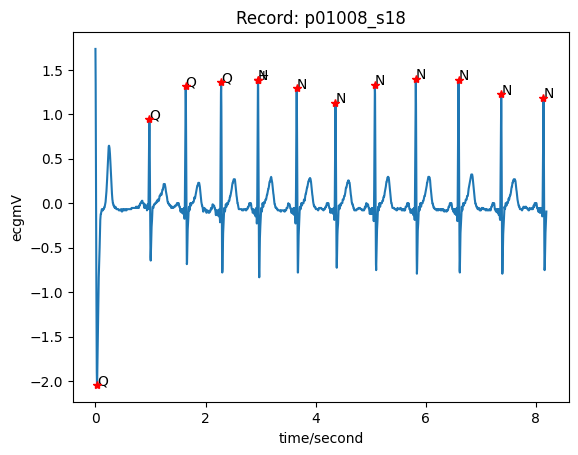

In [5]:
wfdb.plot_wfdb(rec, ann, plot_sym=True)

In [10]:
frames, labels = dataset.get_frames_and_labels(patient_id=1008, segment=18)
print(f"Shape of frames: {frames.shape}. {len(labels)} labels")

Shape of frames: (511, 2049). 511 labels


In [ ]:
# Example of Premature Vascular Contraction (PVC)
# Here, V=ESV (PVC)
rec, ann = dataset.get_recording(patient_id=900, segment=0, start=2000, length=1024)
wfdb.plot_wfdb(rec, ann, plot_sym=True)

In [ ]:
rec.__dict__